In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Get Data

In [2]:
insurance_cost = pd.read_csv("D:/Python Data/Intro_to_DS/Medical_Cost.csv")
insurance_cost.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
insurance_cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
insurance_cost.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
insurance_cost["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [6]:
insurance_cost["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [7]:
insurance_cost["region"].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
insurance_cost_le = insurance_cost.copy()
insurance_cost_le["sex"] = labelencoder.fit_transform(insurance_cost_le['sex'])
print(labelencoder.classes_)
insurance_cost_le["smoker"] = labelencoder.fit_transform(insurance_cost_le['smoker'])
print(labelencoder.classes_)
insurance_cost_le["region"] = labelencoder.fit_transform(insurance_cost_le['region'])
print(labelencoder.classes_)
insurance_cost_le.head()

['female' 'male']
['no' 'yes']
['northeast' 'northwest' 'southeast' 'southwest']


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


<font color='orange'>sex:</font> female:0, male:1 \
<font color='orange'>smoker:</font> no:0, yes:1 \
<font color='orange'>region:</font> northeast:0, northwest:1, southeast:2, southwest:3

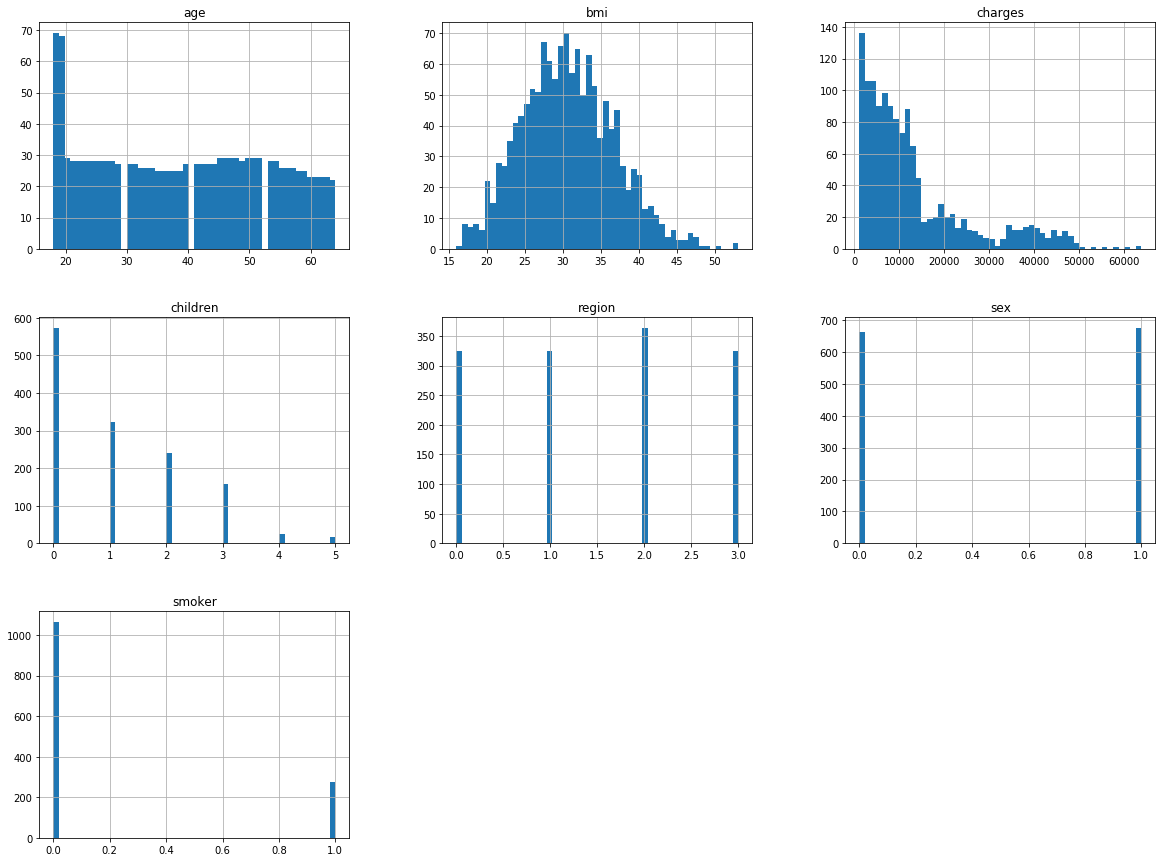

In [9]:
insurance_cost_le.hist(bins=50, figsize=(20,15))
plt.show()

When training our regressor, it may be important to take this into account especially if these scarce values(e.g. 4 - 5 children) have significant impact on the target value. In which case, the training data should incorporates these values to ensure the regressor has seen a representative subset of the data. We will follow-up on this later when we train our regressor.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E7D33DBE48>,
      dtype=object)

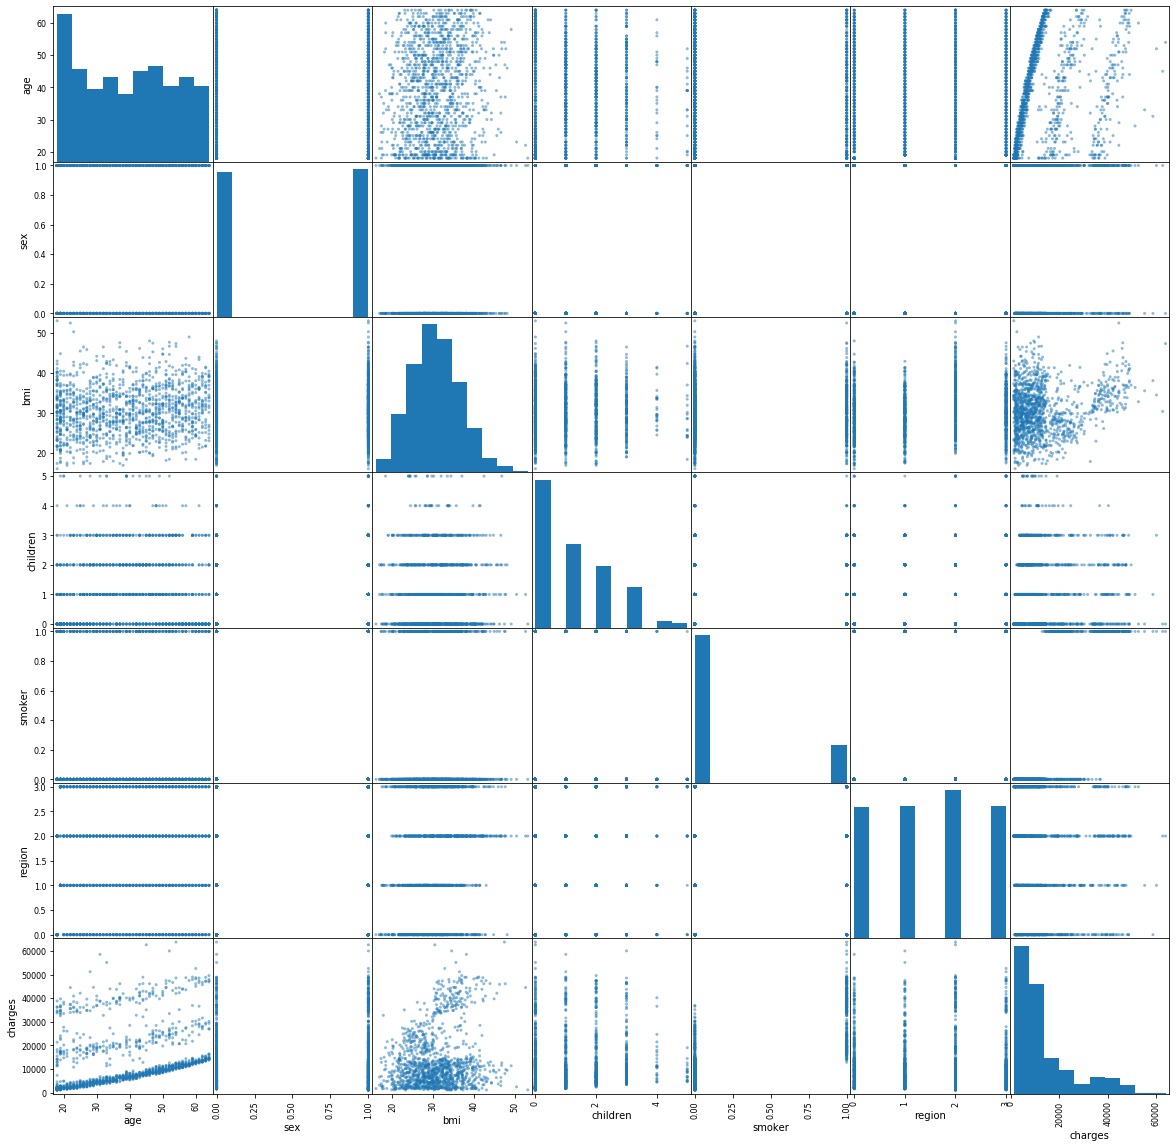

In [10]:
from pandas.plotting import scatter_matrix

attributes = ["age", "sex", "bmi", "children", "smoker", "region", "charges"]
scatter_matrix(insurance_cost_le[attributes], figsize=(20,20))

# Feature Selection

## Age vs Charges

Text(0.5, 1.0, 'Age vs Charges')

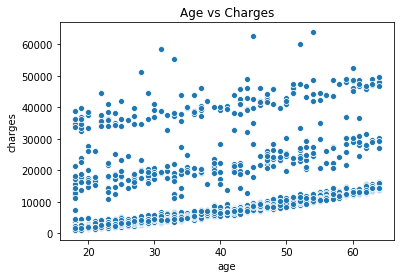

In [11]:
import seaborn as sns
sns.scatterplot(x='age', y='charges', data=insurance_cost)
plt.title("Age vs Charges")

### Age vs Charges: by smoker

Text(0.5, 1.0, 'Age vs Charges: by smoker')

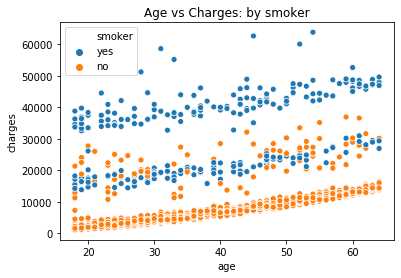

In [12]:
sns.scatterplot(x='age', y='charges', hue='smoker',data=insurance_cost)
plt.title("Age vs Charges: by smoker")

In [13]:
insurance_cost_smoker = insurance_cost[insurance_cost['smoker'] == 'yes']
insurance_cost_nonsmoker = insurance_cost[insurance_cost['smoker'] == 'no']

In [14]:
age_charge_smoker = insurance_cost_smoker[['age', 'charges']]
age_charge_smoker.corr()

,age,charges
age,1.000000,0.368224
charges,0.368224,1.000000


In [15]:
age_charge_nonsmoker = insurance_cost_nonsmoker[['age', 'charges']]
age_charge_nonsmoker.corr()

,age,charges
age,1.000000,0.627947
charges,0.627947,1.000000


In [16]:
from sklearn.linear_model import LinearRegression
lin_reg_smoker = LinearRegression()
lin_reg_smoker.fit(np.array(insurance_cost_smoker['age']).reshape(-1,1), np.array(insurance_cost_smoker['charges']))
age_new = np.arange(80).reshape(-1,1)
predict_smoker = lin_reg_smoker.predict(age_new)

In [17]:
lin_reg_nonsmoker = LinearRegression()
lin_reg_nonsmoker.fit(np.array(insurance_cost_nonsmoker['age']).reshape(-1,1), np.array(insurance_cost_nonsmoker['charges']))
predict_nonsmoker = lin_reg_nonsmoker.predict(age_new)

Text(0.5, 1.0, 'Age vs Charges: Non-smoker')

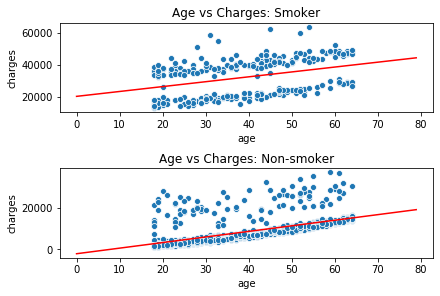

In [18]:
f, (ax1, ax2) = plt.subplots(2, 1, constrained_layout=True)
sns.scatterplot(x='age', y='charges', data=insurance_cost_smoker, ax=ax1)
sns.scatterplot(x='age', y='charges', data=insurance_cost_nonsmoker, ax=ax2)
ax1.plot(age_new, predict_smoker,"r-")
ax2.plot(age_new, predict_nonsmoker, "r-")
ax1.set_title("Age vs Charges: Smoker")
ax2.set_title("Age vs Charges: Non-smoker")

There is a positive correlation between age and charges. Higher age will have a higher insurance charges. \
For smoker: corr = 0.368224 \
For non-smoker: corr=0.368224

### Age vs Charges: by sex

Text(0.5, 1.0, 'Age vs Charges: by sex')

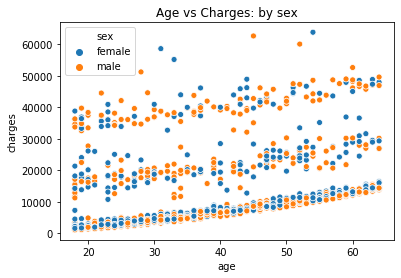

In [19]:
sns.scatterplot(x='age', y='charges', hue='sex',data=insurance_cost)
plt.title("Age vs Charges: by sex")

### Age vs Charges: by BMI

Text(0.5, 1.0, 'Age vs Charges: by bmi')

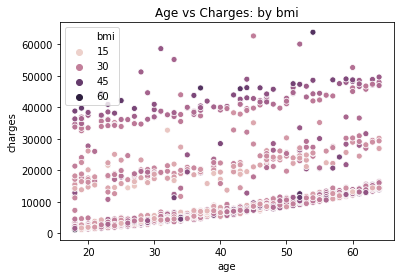

In [20]:
sns.scatterplot(x='age', y='charges', hue='bmi',data=insurance_cost)
plt.title("Age vs Charges: by bmi")

Most of the high charges individual have high bmi

### Age vs Charges: by Children

Text(0.5, 1.0, 'Age vs Charges: by children')

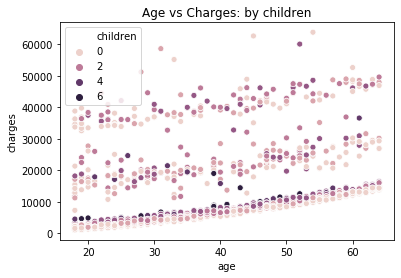

In [21]:
sns.scatterplot(x='age', y='charges', hue='children',data=insurance_cost)
plt.title("Age vs Charges: by children")

### Age vs Charges: by region

Text(0.5, 1.0, 'Age vs Charges: by region')

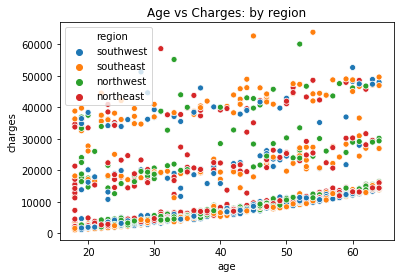

In [22]:
sns.scatterplot(x='age', y='charges', hue='region',data=insurance_cost)
plt.title("Age vs Charges: by region")

Summary for Age vs Sex:
1. by smoke: it is clear that for both smoke and non-smoke individual have a similar coefficient, but with different intercept (smoker: higher intercept)
2. by sex: no relationship
3. by BMI: most of the high charges individuals have a high BMI
4. by Childrem: more children tends to have lower charges
5. by region: no relationship

## Sex vs Charges

Text(0.5, 1, 'Sex vs Charges')

<Figure size 216x216 with 0 Axes>

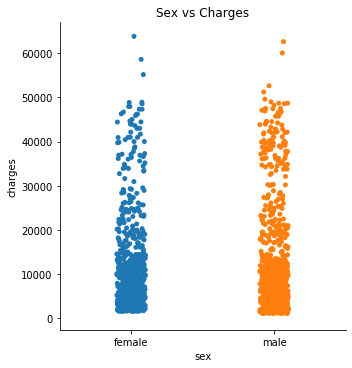

In [23]:
import seaborn as sns
plt.figure(figsize=(3,3))
sns.catplot(x='sex', y='charges', data=insurance_cost)
plt.title('Sex vs Charges')

The distribution charges look similar in both male and female, suggest that "Sex" is not very important in determining the insurance charges.

Text(0.5, 1, 'Sex vs Charges: by smoker')

<Figure size 216x216 with 0 Axes>

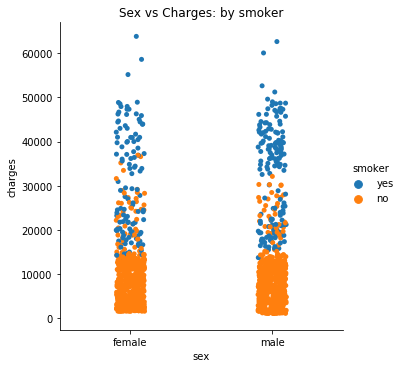

In [183]:
plt.figure(figsize=(3,3))
sns.catplot(x='sex', y='charges', hue='smoker',data=insurance_cost)
plt.title('Sex vs Charges: by smoker')

## BMI vs Charges

Text(0.5, 1.0, 'BMI vs Charges')

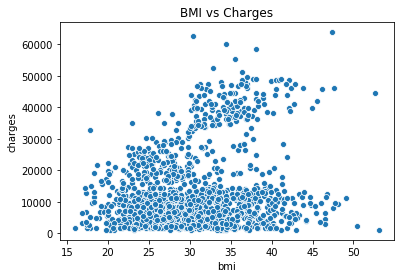

In [24]:
sns.scatterplot(x='bmi', y='charges', data=insurance_cost)
plt.title("BMI vs Charges")

### BMI vs Charges: by Smoker

Text(0.5, 1.0, 'BMI vs Charges: by smoker')

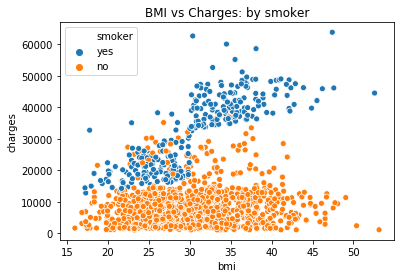

In [25]:
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=insurance_cost)
plt.title("BMI vs Charges: by smoker")

No important relationship found

In [26]:
insurance_cost_smoker = insurance_cost[insurance_cost['smoker'] == 'yes']
bmi_charges_smoker = insurance_cost_smoker[['bmi', 'charges']]
bmi_charges_smoker.corr()

,bmi,charges
bmi,1.000000,0.806481
charges,0.806481,1.000000


In [27]:
insurance_cost_nonsmoker = insurance_cost[insurance_cost['smoker'] == 'no']
bmi_charges_nonsmoker = insurance_cost_nonsmoker[['bmi', 'charges']]
bmi_charges_nonsmoker.corr()

,bmi,charges
bmi,1.000000,0.084037
charges,0.084037,1.000000


In [28]:
lin_reg_smoker = LinearRegression()
lin_reg_smoker.fit(np.array(bmi_charges_smoker['bmi']).reshape(-1,1), np.array(bmi_charges_smoker['charges']))
bmi_new = np.arange(10, 58).reshape(-1,1)
predict_smoker = lin_reg_smoker.predict(bmi_new)

In [29]:
lin_reg_nonsmoker = LinearRegression()
lin_reg_nonsmoker.fit(np.array(bmi_charges_nonsmoker['bmi']).reshape(-1,1), np.array(bmi_charges_nonsmoker['charges']))
predict_nonsmoker = lin_reg_nonsmoker.predict(bmi_new)

Text(0.5, 1.0, 'Non-smoker: BMI vs Chrges')

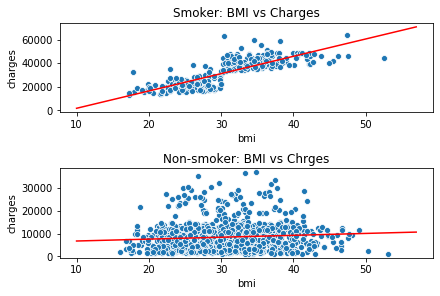

In [30]:
f, (ax1, ax2) = plt.subplots(2, 1, constrained_layout=True)
sns.scatterplot(x='bmi', y='charges', data=bmi_charges_smoker, ax=ax1)
sns.scatterplot(x='bmi', y='charges', data=bmi_charges_nonsmoker, ax=ax2)
ax1.plot(bmi_new, predict_smoker, "r-")
ax2.plot(bmi_new, predict_nonsmoker, "r-")
ax1.set_title('Smoker: BMI vs Charges')
ax2.set_title('Non-smoker: BMI vs Chrges')

We can discover a clear relationship after we divided the data points into smoker and non-smoker. \
\
For smoker: there is a +ve correlation between BMI and charges. (corr=0.806481)\
            there is a clear cut at bmi=30, charges is above 36000\
\
For non-smoker: there is no obvious correlation. (corr=0.084037)

Age, Sex, no. of children and Regions cannot provide additional information to BMI and charges

## No. of Children vs Charges

Text(0.5, 1, 'No. of Children vs Chrges')

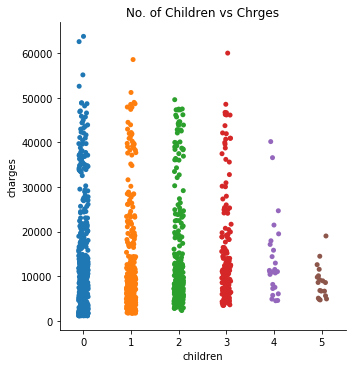

In [31]:
sns.catplot(x='children', y='charges', data=insurance_cost)
plt.title("No. of Children vs Chrges")

Charges for large family (with 4 - 5 children) tends to have lower charges.

Text(0.5, 1, 'No. of Children vs Chrges: by smoker')

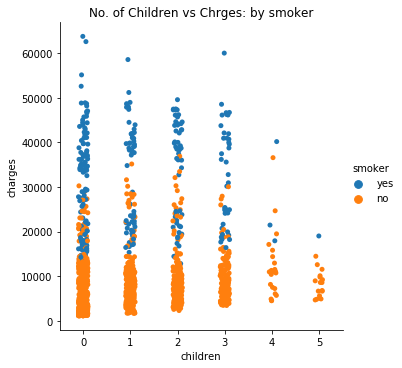

In [184]:
sns.catplot(x='children', y='charges', hue='smoker', data=insurance_cost)
plt.title("No. of Children vs Chrges: by smoker")

## Smoker vs Charges

Text(0.5, 1, 'Smoker vs Charges')

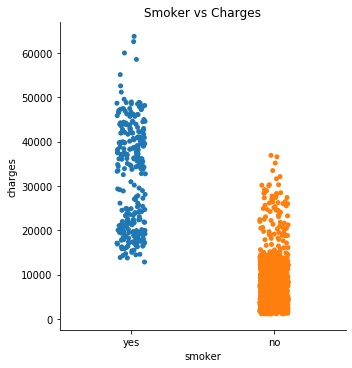

In [32]:
sns.catplot(x='smoker', y='charges', data=insurance_cost)
plt.title('Smoker vs Charges')

There is a cut between smoker and non-smoker. All smokers' insurance charges are above 14000. Most of the non-smokers have charges below 14000.

## Region vs Charges

Text(0.5, 1, 'Region vs Charges')

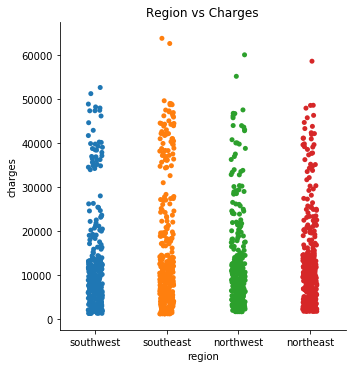

In [187]:
sns.catplot(x='region', y='charges', data=insurance_cost)
plt.title('Region vs Charges')

The distribution charges look similar between different regions, suggest that "Region" is not very important in determining the insurance charges.

Text(0.5, 1, 'Region vs Charges: by smoker')

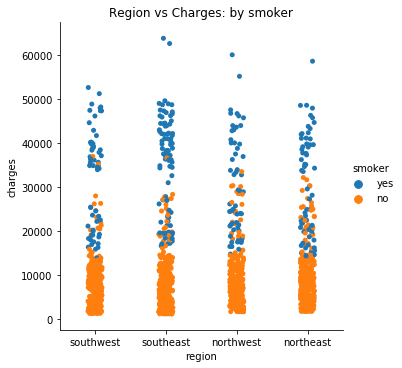

In [186]:
sns.catplot(x='region', y='charges', hue='smoker', data=insurance_cost)
plt.title('Region vs Charges: by smoker')

Summarize the findings from the above feature plots: \
1.Age: +ve correlation (older people have higher charges) 

2.Sex: the distribution of charges are similar in both sex: not an important feature

3.BMI: no obvious relation if we look at it solely. However, there is a clear +ve correlation for     smoker's bmi and charges.

4.No. of Children: Charges for large family (with 4 - 5 children) tends to have lower charges.

5.Smoker: Non-smoker tends to have lower charges while smokers tends to have higher charges.

6.Region: the distribution of charges are similar in different region: not an important feature

It is sure that smoking is a characteristic that definitely affects patient's charges

# Clustering K=4

In [167]:
kmeans = KMeans(n_clusters=4, random_state=42)
y_pred = kmeans.fit_predict(insurance_cost_le)
y_pred

array([3, 1, 1, ..., 1, 1, 0])

In [168]:
# combine the cluster result with the origional data set
y_pred = pd.DataFrame(y_pred, columns={'y_pred'})
insurance_cost_insight = pd.concat([insurance_cost, y_pred], axis=1)
insurance_cost_insight.head()

,age,sex,bmi,children,smoker,region,charges,y_pred
0,19,female,27.900,0,yes,southwest,16884.92400,3
1,18,male,33.770,1,no,southeast,1725.55230,1
2,28,male,33.000,3,no,southeast,4449.46200,1
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,1


## Group 1 (Lowest Charges Group)

In [174]:
insurance_cost_insight[insurance_cost_insight['y_pred'] == 1].describe()

,age,bmi,children,charges,y_pred
count,564.000000,564.000000,564.000000,564.000000,564.0
mean,29.322695,30.099167,1.008865,4232.872628,1.0
std,8.262272,6.095535,1.150300,1943.241563,0.0
min,18.000000,15.960000,0.000000,1121.873900,1.0
25%,22.000000,25.900000,0.000000,2452.422163,1.0
50%,29.000000,29.865000,1.000000,4187.105500,1.0
75%,36.000000,34.100000,2.000000,5967.596300,1.0
max,46.000000,53.130000,5.000000,7749.156400,1.0


In [175]:
print(insurance_cost_insight['sex'][insurance_cost_insight['y_pred'] == 1].value_counts())
print(insurance_cost_insight['smoker'][insurance_cost_insight['y_pred'] == 1].value_counts())
print(insurance_cost_insight['region'][insurance_cost_insight['y_pred'] == 1].value_counts())

male      284
female    280
Name: sex, dtype: int64
no    564
Name: smoker, dtype: int64
southeast    152
northwest    146
southwest    145
northeast    121
Name: region, dtype: int64


All are non-smoker. mean age = 29.32 (young). mean bmi = 30.099 (average)

## Group 2 (Highest Charges Group)

In [177]:
insurance_cost_insight[insurance_cost_insight['y_pred'] == 2].describe()

,age,bmi,children,charges,y_pred
count,155.000000,155.000000,155.000000,155.000000,155.0
mean,39.548387,35.045000,1.135484,41224.580772,2.0
std,14.216870,4.638094,1.128598,5893.662078,0.0
min,18.000000,17.765000,0.000000,32108.662820,2.0
25%,27.000000,31.807500,0.000000,36868.100040,2.0
50%,40.000000,34.800000,1.000000,40103.890000,2.0
75%,51.000000,37.060000,2.000000,44613.326635,2.0
max,64.000000,52.580000,4.000000,63770.428010,2.0


In [178]:
print(insurance_cost_insight['sex'][insurance_cost_insight['y_pred'] == 2].value_counts())
print(insurance_cost_insight['smoker'][insurance_cost_insight['y_pred'] == 2].value_counts())
print(insurance_cost_insight['region'][insurance_cost_insight['y_pred'] == 2].value_counts())

male      98
female    57
Name: sex, dtype: int64
yes    150
no       5
Name: smoker, dtype: int64
southeast    60
southwest    37
northeast    32
northwest    26
Name: region, dtype: int64


Mainly are smokers. average age 39.5. average bmi 35.045 (High). Mainly living in southeast and are male

## Group 0 (2nd High Charges Group)

In [179]:
insurance_cost_insight[insurance_cost_insight['y_pred'] == 0].describe()

,age,bmi,children,charges,y_pred
count,176.000000,176.000000,176.000000,176.000000,176.0
mean,41.051136,28.165114,1.221591,22525.020416,0.0
std,13.448004,4.741619,1.205601,3774.700559,0.0
min,18.000000,18.300000,0.000000,17043.341400,0.0
25%,29.750000,24.795000,0.000000,19359.091325,0.0
50%,42.500000,27.622500,1.000000,21785.661275,0.0
75%,52.000000,29.921250,2.000000,25315.449960,0.0
max,64.000000,41.910000,5.000000,31620.001060,0.0


In [180]:
print(insurance_cost_insight['sex'][insurance_cost_insight['y_pred'] == 0].value_counts())
print(insurance_cost_insight['smoker'][insurance_cost_insight['y_pred'] == 0].value_counts())
print(insurance_cost_insight['region'][insurance_cost_insight['y_pred'] == 0].value_counts())

male      90
female    86
Name: sex, dtype: int64
yes    102
no      74
Name: smoker, dtype: int64
southeast    52
northwest    48
northeast    47
southwest    29
Name: region, dtype: int64


Nothing Special

## Group 3 (2nd low charges group)

In [181]:
insurance_cost_insight[insurance_cost_insight['y_pred'] == 3].describe()

,age,bmi,children,charges,y_pred
count,443.000000,443.000000,443.000000,443.000000,443.0
mean,50.939052,30.841219,1.139955,11318.896650,3.0
std,10.204177,6.253771,1.293320,2208.577911,0.0
min,18.000000,17.195000,0.000000,7789.635000,3.0
25%,47.000000,26.310000,0.000000,9447.316375,3.0
50%,53.000000,30.780000,1.000000,11244.376900,3.0
75%,58.000000,34.982500,2.000000,12927.338550,3.0
max,64.000000,49.060000,5.000000,16884.924000,3.0


In [182]:
print(insurance_cost_insight['sex'][insurance_cost_insight['y_pred'] == 3].value_counts())
print(insurance_cost_insight['smoker'][insurance_cost_insight['y_pred'] == 3].value_counts())
print(insurance_cost_insight['region'][insurance_cost_insight['y_pred'] == 3].value_counts())

female    239
male      204
Name: sex, dtype: int64
no     421
yes     22
Name: smoker, dtype: int64
northeast    124
southwest    114
northwest    105
southeast    100
Name: region, dtype: int64


Generally are non-smoker. mean age = 50.9 (above average). mean bmi = 30.84 (average)

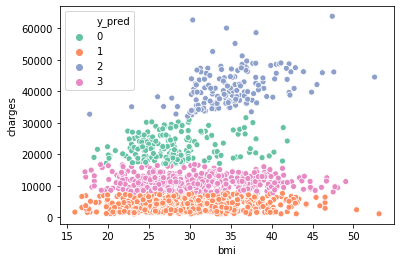

In [190]:
sns.scatterplot(x='bmi', y='charges', hue='y_pred', data=insurance_cost_insight, palette="Set2")

## Summary for Clustering K=4

1. Group 1 (Lowest Charges Group):
    All are non-smoker, young and have average bmi
2. Group 2 (Highest Charges Group): 
    Mainly are smokers. mean age = 39.5 (middle age). High bmi (35.045). Mainly living in southeast and are male
3. Group 0 & 3: 
    The age, bmi and most of the factors are similar. However the ratio of smoker in group 0 is higher than in group 3 which may lead to a higher average charges for group 0.

# Clustering K=6

In [55]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6, random_state=42)
y_pred = kmeans.fit_predict(insurance_cost_le)
y_pred

array([5, 3, 3, ..., 3, 3, 2])

In [56]:
# combine the cluster result with the origional data set
y_pred = pd.DataFrame(y_pred, columns={'y_pred'})
insurance_cost_le_insight = pd.concat([insurance_cost, y_pred], axis=1)
insurance_cost_le_insight.head()

,age,sex,bmi,children,smoker,region,charges,y_pred
0,19,female,27.900,0,yes,southwest,16884.92400,5
1,18,male,33.770,1,no,southeast,1725.55230,3
2,28,male,33.000,3,no,southeast,4449.46200,3
3,33,male,22.705,0,no,northwest,21984.47061,2
4,32,male,28.880,0,no,northwest,3866.85520,3


## Cluster Group 0

In [57]:
insurance_cost_le_insight[insurance_cost_le_insight['y_pred'] == 0].describe()

,age,bmi,children,charges,y_pred
count,335.000000,335.000000,335.000000,335.000000,335.0
mean,43.889552,30.721612,1.474627,7996.318929,0.0
std,5.802362,6.086259,1.232706,1376.614026,0.0
min,18.000000,16.815000,0.000000,5615.369000,0.0
25%,40.000000,26.410000,1.000000,6778.657600,0.0
50%,44.000000,30.200000,1.000000,8026.666600,0.0
75%,48.500000,34.320000,2.000000,9188.004250,0.0
max,55.000000,48.070000,5.000000,10461.979400,0.0


In [58]:
insurance_cost_le_insight['smoker'][insurance_cost_le_insight['y_pred'] == 0].value_counts()

no    335
Name: smoker, dtype: int64

In [59]:
insurance_cost_le_insight['sex'][insurance_cost_le_insight['y_pred'] == 0].value_counts()

male      169
female    166
Name: sex, dtype: int64

In [60]:
insurance_cost_le_insight['region'][insurance_cost_le_insight['y_pred'] == 0].value_counts()

southwest    90
northeast    82
northwest    82
southeast    81
Name: region, dtype: int64

For Cluster Group 0: all are non-smoker with mean age = 43.8 and mean bmi = 30.7--> mean charges: 7796.3

## Cluster Group 1

In [61]:
insurance_cost_le_insight[insurance_cost_le_insight['y_pred'] == 1].describe()

,age,bmi,children,charges,y_pred
count,65.000000,65.000000,65.000000,65.000000,65.0
mean,50.476923,37.063385,1.261538,46736.562324,1.0
std,10.568390,4.712793,1.093688,4649.866352,0.0
min,22.000000,30.210000,0.000000,41919.097000,1.0
25%,44.000000,33.880000,0.000000,43813.866100,1.0
50%,52.000000,36.400000,1.000000,46130.526500,1.0
75%,60.000000,39.900000,2.000000,47928.030000,1.0
max,64.000000,52.580000,3.000000,63770.428010,1.0


In [62]:
insurance_cost_le_insight['smoker'][insurance_cost_le_insight['y_pred'] == 1].value_counts()

yes    65
Name: smoker, dtype: int64

In [63]:
insurance_cost_le_insight['sex'][insurance_cost_le_insight['y_pred'] == 1].value_counts()

male      40
female    25
Name: sex, dtype: int64

In [64]:
insurance_cost_le_insight['region'][insurance_cost_le_insight['y_pred'] == 1].value_counts()

southeast    30
northeast    12
northwest    12
southwest    11
Name: region, dtype: int64

For Cluster Group 1: All are smoker with mean age = 50.4 and mean bmi = 37.06 --> mean charges: 46736.5 \
Southeast region seems having more people which are categorize in this cluster

## Cluster Group 2

In [65]:
insurance_cost_le_insight[insurance_cost_le_insight['y_pred'] == 2].describe()

,age,bmi,children,charges,y_pred
count,155.000000,155.000000,155.000000,155.000000,155.0
mean,41.729032,28.203742,1.212903,22631.660007,2.0
std,12.720936,4.807564,1.200579,3292.331028,0.0
min,18.000000,18.300000,0.000000,17878.900680,2.0
25%,30.500000,24.827500,0.000000,19696.515215,2.0
50%,43.000000,27.600000,1.000000,21984.470610,2.0
75%,52.000000,30.010000,2.000000,24998.494345,2.0
max,64.000000,41.910000,5.000000,29523.165600,2.0


In [66]:
insurance_cost_le_insight['smoker'][insurance_cost_le_insight['y_pred'] == 2].value_counts()

yes    88
no     67
Name: smoker, dtype: int64

In [67]:
insurance_cost_le_insight['sex'][insurance_cost_le_insight['y_pred'] == 2].value_counts()

female    78
male      77
Name: sex, dtype: int64

In [68]:
insurance_cost_le_insight['region'][insurance_cost_le_insight['y_pred'] == 2].value_counts()

southeast    46
northeast    42
northwest    40
southwest    27
Name: region, dtype: int64

For Cluster Group 2: half smoker, half non-smoker, mean age = 41.7 and mean bmi = 28.2 --> mean charges: 22631.66

## Cluster Group 3

In [69]:
insurance_cost_le_insight[insurance_cost_le_insight['y_pred'] == 3].describe()

,age,bmi,children,charges,y_pred
count,405.000000,405.000000,405.000000,405.000000,405.0
mean,25.412346,29.885864,0.775309,3248.593494,3.0
std,5.853436,6.160978,1.046627,1293.447691,0.0
min,18.000000,15.960000,0.000000,1121.873900,3.0
25%,20.000000,25.745000,0.000000,2117.338850,3.0
50%,25.000000,29.735000,0.000000,3176.287700,3.0
75%,30.000000,33.770000,1.000000,4433.915900,3.0
max,40.000000,53.130000,5.000000,5594.845500,3.0


In [70]:
insurance_cost_le_insight['smoker'][insurance_cost_le_insight['y_pred'] == 3].value_counts()

no    405
Name: smoker, dtype: int64

In [71]:
insurance_cost_le_insight['sex'][insurance_cost_le_insight['y_pred'] == 3].value_counts()

male      205
female    200
Name: sex, dtype: int64

In [72]:
insurance_cost_le_insight['region'][insurance_cost_le_insight['y_pred'] == 3].value_counts()

southeast    116
northwest    101
southwest    100
northeast     88
Name: region, dtype: int64

For Cluster Group 3: all non-smoker, mean age = 25.4 (young) and mean bmi = 29.88 --> mean charges: 3248.59

## Cluster Group 4

In [73]:
insurance_cost_le_insight[insurance_cost_le_insight['y_pred'] == 4].describe()

,age,bmi,children,charges,y_pred
count,97.000000,97.000000,97.000000,97.000000,97.0
mean,33.608247,33.359175,1.103093,36757.272529,4.0
std,12.706262,4.154692,1.168016,2995.532442,0.0
min,18.000000,17.765000,0.000000,30063.580550,4.0
25%,23.000000,30.900000,0.000000,34672.147200,4.0
50%,32.000000,33.330000,1.000000,36950.256700,4.0
75%,43.000000,35.750000,2.000000,39241.442000,4.0
max,64.000000,44.880000,4.000000,41676.081100,4.0


In [74]:
insurance_cost_le_insight['smoker'][insurance_cost_le_insight['y_pred'] == 4].value_counts()

yes    87
no     10
Name: smoker, dtype: int64

In [75]:
insurance_cost_le_insight['sex'][insurance_cost_le_insight['y_pred'] == 4].value_counts()

male      63
female    34
Name: sex, dtype: int64

In [76]:
insurance_cost_le_insight['region'][insurance_cost_le_insight['y_pred'] == 4].value_counts()

southeast    31
southwest    26
northeast    23
northwest    17
Name: region, dtype: int64

For Cluster Group 4: mainly smoker, mean age = 33.6 and mean bmi = 33.36 --> mean charges: 36757.2

## Cluster Group 5

In [77]:
insurance_cost_le_insight[insurance_cost_le_insight['y_pred'] == 5].describe()

,age,bmi,children,charges,y_pred
count,281.000000,281.000000,281.000000,281.000000,281.0
mean,51.441281,30.660391,0.996441,12989.816715,5.0
std,13.695057,6.217530,1.291451,1835.272066,0.0
min,18.000000,17.195000,0.000000,10493.945800,5.0
25%,52.000000,26.220000,0.000000,11520.099850,5.0
50%,56.000000,30.500000,0.000000,12622.179500,5.0
75%,60.000000,35.100000,2.000000,14007.222000,5.0
max,64.000000,49.060000,5.000000,17748.506200,5.0


In [78]:
insurance_cost_le_insight['smoker'][insurance_cost_le_insight['y_pred'] == 5].value_counts()

no     247
yes     34
Name: smoker, dtype: int64

In [79]:
insurance_cost_le_insight['sex'][insurance_cost_le_insight['y_pred'] == 5].value_counts()

female    159
male      122
Name: sex, dtype: int64

In [80]:
insurance_cost_le_insight['region'][insurance_cost_le_insight['y_pred'] == 5].value_counts()

northeast    77
northwest    73
southwest    71
southeast    60
Name: region, dtype: int64

For Cluster Group 5: mainly non-smoker, mean age = 51.4 (high) and mean bmi = 30.66 --> mean charges: 12989.816

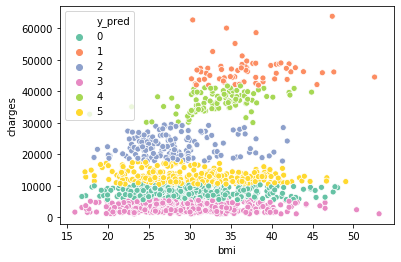

In [189]:
sns.scatterplot(x='bmi', y='charges', hue='y_pred', data=insurance_cost_le_insight, palette="Set2")

## Summary of Cluster Groups

For Cluster Group 0: all are non-smoker with mean age = 43.8 and mean bmi = 30.7--> mean charges: 7796.3 \
\
For Cluster Group 1: All are smoker with mean age = 50.4 (high) and mean bmi = 37.06 (high) --> mean charges: 46736.5 \
Southeast region seems having more people which are categorize in this cluster \
\
For Cluster Group 2: half smoker, half non-smoker, mean age = 41.7 and mean bmi = 28.2 --> mean charges: 22631.66 \
\
For Cluster Group 3: all non-smoker, mean age = 25.4 (young) and mean bmi = 29.88 --> mean charges: 3248.59 \
\
For Cluster Group 4: mainly smoker, mean age = 33.6 and mean bmi = 33.36 --> mean charges: 36757.2 \
\
For Cluster Group 5: mainly non-smoker, mean age = 51.4 (high) and mean bmi = 30.66 --> mean charges: 12989.816

Therefore, we discover that individual who are old, high bmi and smoke tends to have highest insurance charges. \
Non-smoker that in young age and low bmi tends to have lowest charges. \
For middle age (35-45) individual that have moderate bmi, smoker will have a higher charges.

# Feature Processing: Handling Categorical Data

Due to we have three attributes are nominal type (sex, smoker and region). To avoid applying a rank order over these categories, we created dummies for different category. Value of 1 indicate that attribute apply to that individual whild value of 0 indicate not apply.

In [81]:
# change the categorical data in to dummies
from sklearn.preprocessing import LabelEncoder
insurance_cost_dum = insurance_cost.copy()
labelencoder = LabelEncoder()
insurance_cost_dum['sex'] = labelencoder.fit_transform(insurance_cost_dum['sex'])
insurance_cost_dum['smoker'] = labelencoder.fit_transform(insurance_cost_dum['smoker'])
insurance_cost_dum.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [82]:
insurance_cost_region_dummies = pd.get_dummies(insurance_cost_dum['region'])
insurance_cost_region_dummies = pd.DataFrame(insurance_cost_region_dummies).drop('northeast', axis=1)
#concat 2 dataframe into 1
insurance_cost_dum = pd.concat([insurance_cost_dum, insurance_cost_region_dummies], axis=1)
insurance_cost_dum = insurance_cost_dum.drop('region', axis=1)

In [83]:
insurance_cost_dum.head()

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


# Train Test Set Splitting: Handling Sampling Bias

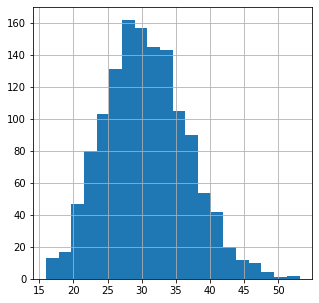

In [84]:
# "BMI" histogram the distribution is right-skewed
insurance_cost_dum['bmi'].hist(bins=20, figsize=(5,5))

When splitting our data, both training/test sets should include the scarce values (ex. >40) so that they are representative of the overall dataset. Otherwise, we run the risk of our regressor not having seen these points yet and having difficulty determining the insurance charges and/or conversely not having test data to evaluate our regressor thoroughly. \
We will use stratified splitting as opposed to normal splitting to handle sampling bias.

Text(0, 0.5, 'Charges')

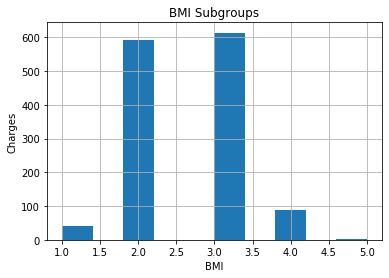

In [85]:
# Stratified splitting with "BMI"
# Divide "BMI" into subgroups and sample the correct proportion of data points from each subgroup
insurance_cost_dum["bmi_subgroups"] = pd.cut(insurance_cost_dum['bmi'],
                                             bins=[10, 20, 30, 40, 50, np.inf],
                                             labels=[1, 2, 3, 4, 5])
insurance_cost_dum["bmi_subgroups"].hist()
plt.title("BMI Subgroups")
plt.xlabel("BMI")
plt.ylabel("Charges")

In [86]:
# get the Train Test set
from sklearn.model_selection import StratifiedShuffleSplit
stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in stratified_split.split(insurance_cost_dum, insurance_cost_dum["bmi_subgroups"]):
    stratified_train_set = insurance_cost_dum.loc[train_index]
    stratified_test_set = insurance_cost_dum.loc[test_index]

In [87]:
# compare the proportion with actual proportions
comparison_df = pd.DataFrame({"Overall Data bmi_subgroups Proportions": insurance_cost_dum['bmi_subgroups'].value_counts() / len(insurance_cost),
                              "Stratified Splitting bmi_subgroups Proportions": stratified_train_set["bmi_subgroups"].value_counts() / len(stratified_train_set)})
print(comparison_df)

   Overall Data bmi_subgroups Proportions  \
3                                0.458894   
2                                0.442451   
4                                0.065770   
1                                0.030643   
5                                0.002242   

   Stratified Splitting bmi_subgroups Proportions  
3                                        0.458879  
2                                        0.442991  
4                                        0.065421  
1                                        0.030841  
5                                        0.001869  


In [88]:
# remove the "Na_to_K_subgroups" feature from the train/test set
stratified_train_set.drop("bmi_subgroups", axis=1, inplace=True)
stratified_test_set.drop("bmi_subgroups", axis=1, inplace=True)

# ML Model Training

In [89]:
X_train = stratified_train_set.drop("charges", axis=1)
X_test = stratified_test_set.drop("charges", axis=1)

y_train = stratified_train_set['charges']
y_test = stratified_test_set['charges']

## 1. Linear Regression

In [90]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [91]:
from sklearn.metrics import mean_squared_error

lin_predictions = lin_reg.predict(X_test)
lin_mse = mean_squared_error(y_test, lin_predictions)
lin_rmse = np.sqrt(lin_mse)
print("linear RMSE:", lin_rmse)

linear RMSE: 6424.935804901247


## 2. Lasso Regression

In [92]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [93]:
lasso_predictions = lasso_reg.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_predictions)
lasso_rmse = np.sqrt(lasso_mse)
print("lasso RMSE: ", lasso_rmse)

lasso RMSE:  6424.912044136888


## 3. Decision Tree Regressor

In [94]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [95]:
tree_predictions = tree_reg.predict(X_test)
tree_mse = mean_squared_error(y_test, tree_predictions)
tree_rmse = np.sqrt(tree_mse)
print("tree RMSE: ", tree_rmse)

tree RMSE:  7232.3105181307765


## 4. Random Forest Regressor

In [96]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [97]:
forest_predictions = forest_reg.predict(X_test)
forest_mse = mean_squared_error(y_test, forest_predictions)
forest_rmse = np.sqrt(forest_mse)
print("forest RMSE: ", forest_rmse)

forest RMSE:  4989.800248382507
